# Estudo de ampacidade
Exemplo de variação de alguns parâmetros em função da temperatura ou corrente

As funções não são diretamente associadas as normas, somente para validar

In [1]:
from normaslt import geral
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

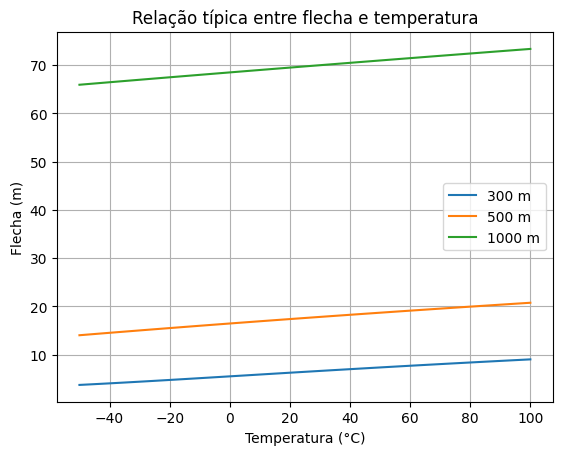

In [2]:
cabo = geral.dbCabo.CAA_HAWK
eds = 0.2
t1 = np.linspace(-50, 100, 100)
t0 = 20
f300 = np.zeros(len(t1))
f500 = np.zeros(len(t1))
f1000 = np.zeros(len(t1))
T300 = np.zeros(len(t1))
T500 = np.zeros(len(t1))
T1000 = np.zeros(len(t1))
for i,t in enumerate(t1):
    f300[i], T300[i] = geral.equacaoEstado(cabo.p, 300, cabo.T * eds, cabo.S, cabo.E, cabo.alfa1, t0, t)
    f500[i], T500[i] = geral.equacaoEstado(cabo.p, 500, cabo.T * eds, cabo.S, cabo.E, cabo.alfa1, t0, t)
    f1000[i], T1000[i] = geral.equacaoEstado(cabo.p, 1000, cabo.T * eds, cabo.S, cabo.E, cabo.alfa1, t0, t)

plt.plot(t1, f300, label='300 m')
plt.plot(t1, f500, label='500 m')
plt.plot(t1, f1000, label='1000 m')
plt.title('Relação típica entre flecha e temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Flecha (m)')
plt.grid(True)
plt.legend()
plt.show()

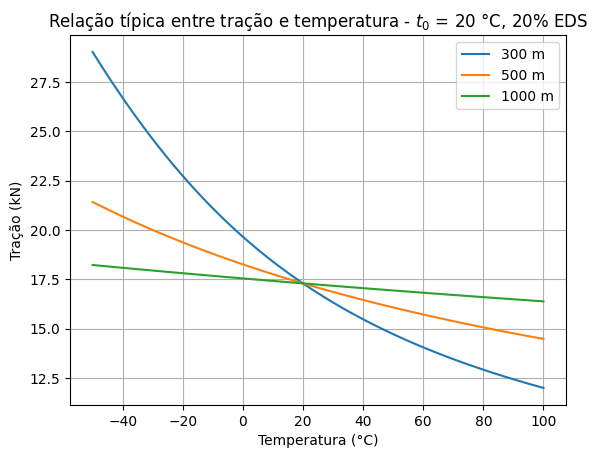

In [3]:
plt.plot(t1, T300*1e-3, label='300 m')
plt.plot(t1, T500*1e-3, label='500 m')
plt.plot(t1, T1000*1e-3, label='1000 m')
plt.title('Relação típica entre tração e temperatura - $t_0$ = 20 °C, 20% EDS')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Tração (kN)')
plt.grid(True)
plt.legend()
plt.show()

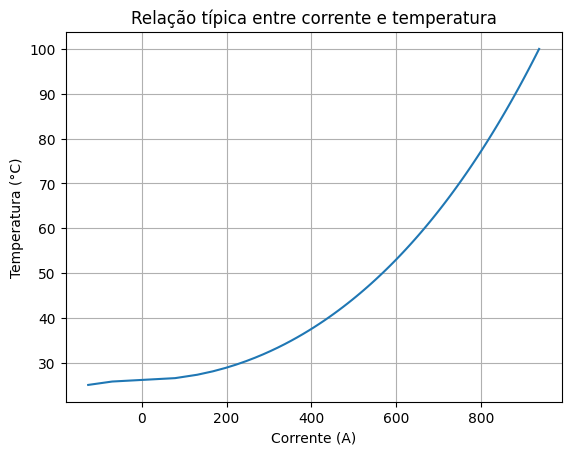

In [4]:
t1 = np.linspace(25, 100, 100)
amp = np.zeros(len(t1))
vvento = 1.
tempAr = 20.
radglobal = 1000.
alt = 0.
rugcond = 0.9
absorcao = 0.5
emicond = 0.5
for i,t in enumerate(t1):
    amp[i] = geral.ampacidadeCigre(t, vvento, pi/2, tempAr, radglobal, alt, cabo, rugcond, absorcao, emicond)

plt.plot(amp, t1)
plt.title('Relação típica entre corrente e temperatura')
plt.xlabel('Corrente (A)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

## Teste com a função de _root finding_

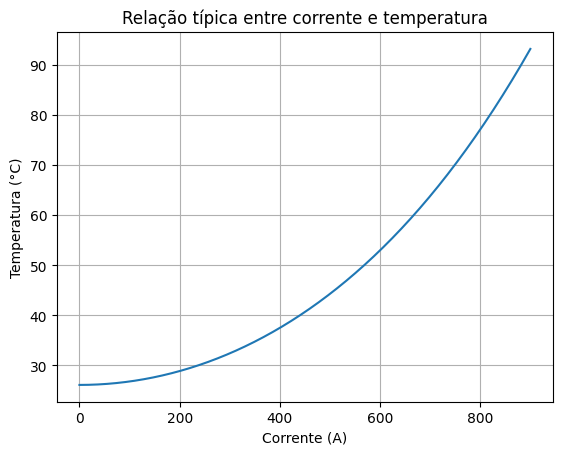

In [5]:
amp = np.linspace(0, 900, 50)
t1 = np.zeros(len(amp))
vvento = 1.
tempAr = 20.
radglobal = 1000.
alt = 0.
rugcond = 0.9
absorcao = 0.5
emicond = 0.5
for i,a in enumerate(amp):
    t1[i] = geral.tempCondutorCigre(a, vvento, pi/2, tempAr, radglobal, alt, cabo, rugcond, absorcao, emicond)

plt.plot(amp, t1)
plt.title('Relação típica entre corrente e temperatura')
plt.xlabel('Corrente (A)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()